In [4]:
import numpy as np
import psrchive as psr
import matplotlib.pyplot as plt
import os
import astropy.stats as ast
from astropy.utils import NumpyRNGContext
import scipy.stats as scs
%matplotlib notebook

## 4pulse

In [5]:
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed')

DM_chi_4p=np.genfromtxt("DM_chi_withk_4pulInt_all.txt")  # data containing "DM DM_err Chi_sqr" as a table
DM_pptoa_4p=np.genfromtxt("DM_pptoa_4p")
##Deleting Bad data 
DM_chi_4p=np.delete(DM_chi_4p,[4300,4301,4305,4312,4313,4316,4317,5419,7294],0)
DM_pptoa_4p=np.delete(DM_pptoa_4p,[4300,4301,4305,4312,4313,4316,4317,5419,7294],0)

In [6]:
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/4pul_Integrated/')

ar_4p=psr.Archive_load("All_4p.ar")
ar_4p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_4p
ar_4p.dedisperse()
ar_4p.fscrunch()
ar_4p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_4p=ar_4p.get_data()
dim_4p=data_4p.shape

In [7]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_4p=np.ndarray([dim_4p[0],dim_4p[2]])

for i in range(dim_4p[0]):
    for j in range(dim_4p[2]):
        Ener_main_comp_4p[i,j]=np.divide(np.sum(data_4p[i,pol,j,300:420]-np.mean(data_4p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_4p[i,pol,j,800:1020])))

##Deleting bad Data
Ener_main_comp_4p=np.delete(Ener_main_comp_4p,[4300,4301,4305,4312,4313,4316,4317,5419,7294],0)
        
## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_4p_noise=np.ndarray([dim_4p[0],dim_4p[2]])

for i in range(dim_4p[0]):
    for j in range(dim_4p[2]):
        Ener_main_comp_4p_noise[i,j]=np.divide(np.sum(data_4p[i,pol,j,650:770]-np.mean(data_4p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_4p[i,pol,j,800:1020])))

Ener_main_comp_4p_noise=np.delete(Ener_main_comp_4p_noise,[4300,4301,4305,4312,4313,4316,4317,5419,7294],0)

<IPython.core.display.Javascript object>


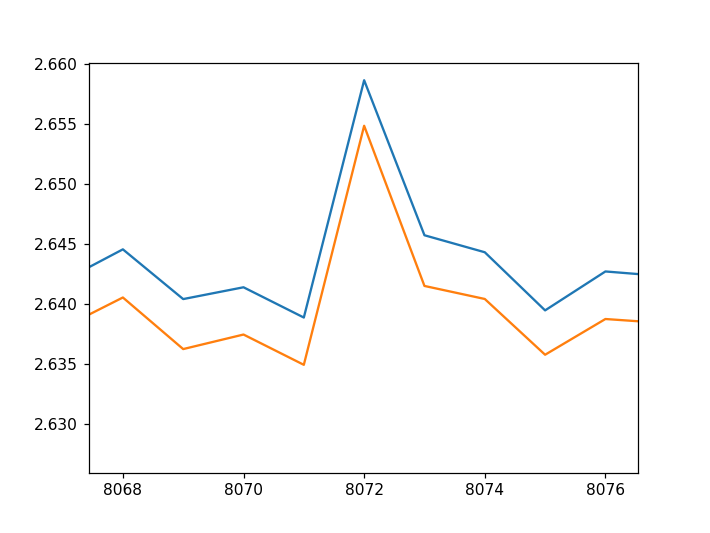

<IPython.core.display.Javascript object>


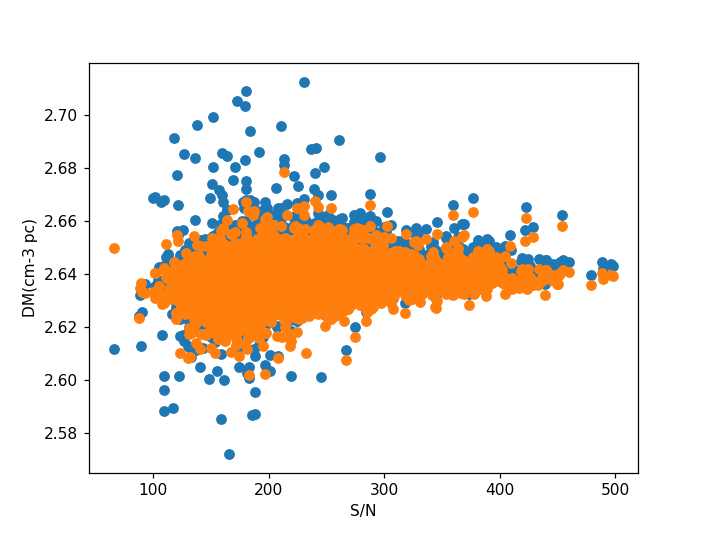

Text(0, 0.5, 'DM(cm-3 pc)')

In [9]:
plt.figure()
plt.plot(DM_chi_4p[0:dim_4p[0],0])
plt.plot(DM_pptoa_4p[0:dim_4p[0]])
plt.figure()
#Fig_4p, Axs_4p = plt.subplots(nrows=3,ncols=3)
#for r in range(3):
 #   for j in range(3):
  #      Axs_4p[r,j].scatter(Ener_main_comp_4p[:,2*r+2*j+3],DM_chi_4p[0:dim_4p[0],0],label='Ch'+str(2*r+2*j+3))
   #     Axs_4p[r,j].legend()
plt.scatter(Ener_main_comp_4p[:,0],DM_chi_4p[0:dim_4p[0],0],label='4p')
plt.scatter(Ener_main_comp_4p[:,0],DM_pptoa_4p[0:dim_4p[0]],label='4pp')
plt.xlabel('S/N')
plt.ylabel('DM(cm-3 pc)')


In [6]:
COF_4p=np.ndarray([dim_4p[0],dim_4p[2]])
sum=0
for i in range(dim_4p[0]):
    for j in range(dim_4p[3]):
        sum+=j*data_4p[i,0,0,j]
    COF_4p[i,0]=np.divide(sum,np.sum(data_4p[i,0,0,:]))
    sum=0
COF_4p=np.delete(COF_4p,[4300,4301,4305,4312,4313,4316,4317,5419,7294],0)



<IPython.core.display.Javascript object>


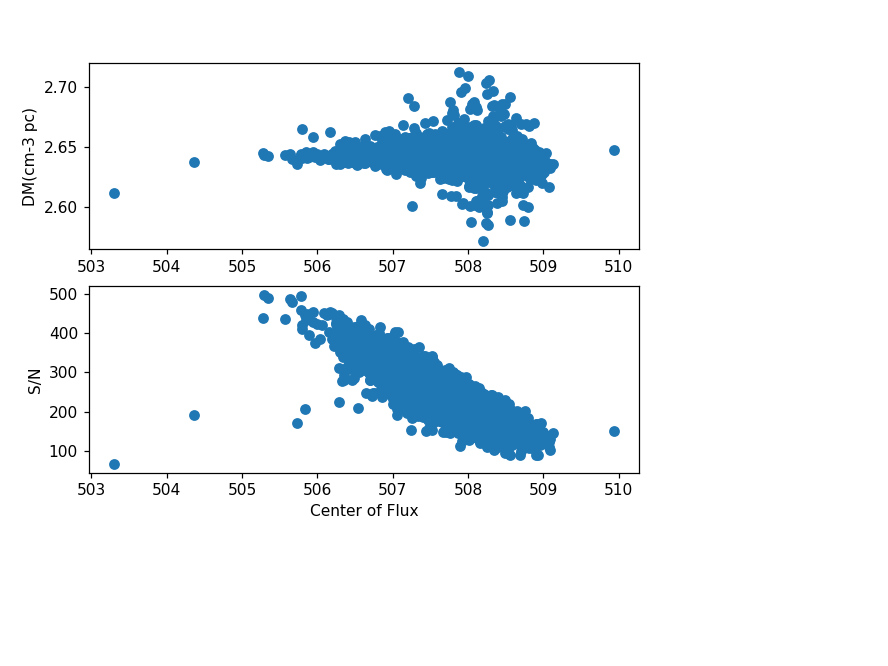

Text(0, 0.5, 'S/N')

In [7]:
plt.figure()
plt.subplot(2,1,1)
plt.scatter(COF_4p[:,0],DM_chi_4p[0:dim_4p[0],0])
plt.ylabel("DM(cm-3 pc)")
plt.subplot(2,1,2)
plt.scatter(COF_4p[:,0],Ener_main_comp_4p[:,0])
plt.xlabel("Center of Flux")
plt.ylabel("S/N")

## 16Pulse

In [10]:
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed')

DM_chi_16p=np.genfromtxt("DM_chi_withk_16pulInt_all.txt")  # data containing "DM DM_err Chi_sqr" as a table
DM_pptoa_16p=np.genfromtxt("DM_pptoa_16p")
##Deleting Bad data 
DM_chi_16p=np.delete(DM_chi_16p,[1076,1078],0)
DM_pptoa_16p=np.delete(DM_pptoa_16p,[1076,1078],0)

In [11]:
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/16pul_Integrated/')

ar_16p=psr.Archive_load("All_16p.ar")
ar_16p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_16p
ar_16p.dedisperse()
ar_16p.fscrunch()
ar_16p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_16p=ar_16p.get_data()
dim_16p=data_16p.shape

In [12]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_16p=np.ndarray([dim_16p[0],dim_16p[2]])

for i in range(dim_16p[0]):
    for j in range(dim_16p[2]):
        Ener_main_comp_16p[i,j]=np.divide(np.sum(data_16p[i,pol,j,300:420]-np.mean(data_16p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_16p[i,pol,j,800:1020])))

##Deleting bad Data
Ener_main_comp_16p=np.delete(Ener_main_comp_16p,[1076,1078],0)
        
## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_16p_noise=np.ndarray([dim_16p[0],dim_16p[2]])

for i in range(dim_16p[0]):
    for j in range(dim_16p[2]):
        Ener_main_comp_16p_noise[i,j]=np.divide(np.sum(data_16p[i,pol,j,650:770]-np.mean(data_16p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_16p[i,pol,j,800:1020])))

Ener_main_comp_16p_noise=np.delete(Ener_main_comp_16p_noise,[1076,1078],0)

<IPython.core.display.Javascript object>


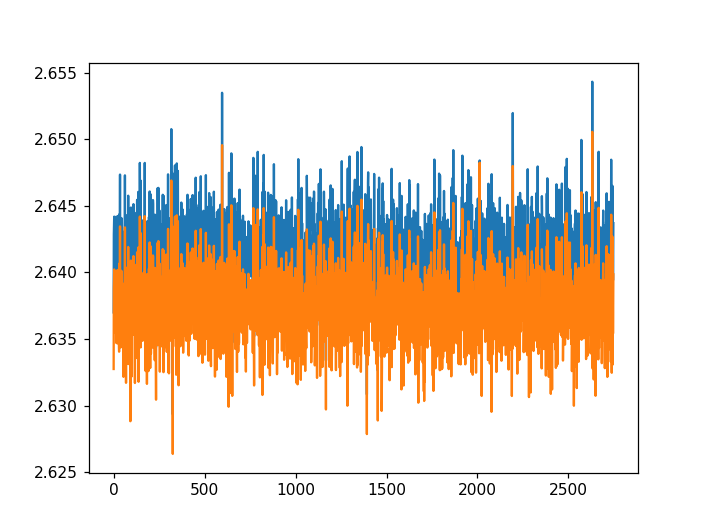

<IPython.core.display.Javascript object>


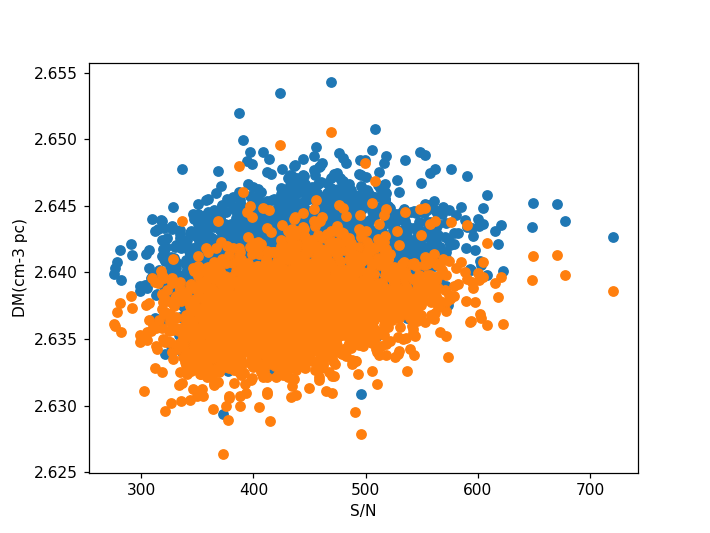

Text(0, 0.5, 'DM(cm-3 pc)')

In [13]:
plt.figure()
plt.plot(DM_chi_16p[0:dim_16p[0],0])
plt.plot(DM_pptoa_16p[0:dim_16p[0]])
plt.figure()
#Fig_16p, Axs_16p = plt.subplots(nrows=3,ncols=3)
#for r in range(3):
 #   for j in range(3):
  #      Axs_16p[r,j].scatter(Ener_main_comp_16p[:,2*r+2*j+3],DM_chi_16p[0:dim_16p[0],0],label='Ch'+str(2*r+2*j+3))
   #     Axs_16p[r,j].legend()
plt.scatter(Ener_main_comp_16p[:,0],DM_chi_16p[0:dim_16p[0],0],label='16p')
plt.scatter(Ener_main_comp_16p[:,0],DM_pptoa_16p[0:dim_16p[0]],label='16pp')
plt.xlabel('S/N')
plt.ylabel('DM(cm-3 pc)')


In [15]:
COF_16p=np.ndarray([dim_16p[0],dim_16p[2]])
sum=0
for i in range(dim_16p[0]):
    for j in range(dim_16p[3]):
        sum+=j*data_16p[i,0,0,j]
    COF_16p[i,0]=np.divide(sum,np.sum(data_16p[i,0,0,:]))
    sum=0
COF_16p=np.delete(COF_16p,[1076,1078],0)



<IPython.core.display.Javascript object>


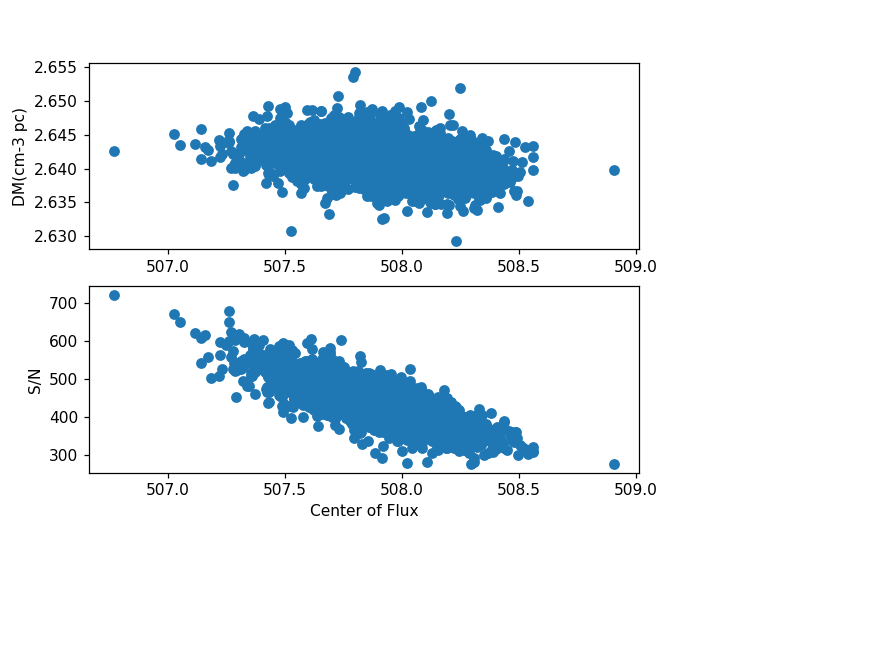

Text(0, 0.5, 'S/N')

In [16]:
plt.figure()
plt.subplot(2,1,1)
plt.scatter(COF_16p[:,0],DM_chi_16p[0:dim_16p[0],0])
plt.ylabel("DM(cm-3 pc)")
plt.subplot(2,1,2)
plt.scatter(COF_16p[:,0],Ener_main_comp_16p[:,0])
plt.xlabel("Center of Flux")
plt.ylabel("S/N")

## 64 Pulse

In [42]:
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed')

DM_chi_64p=np.genfromtxt("DM_chi_withk_64pulInt_all.txt")  # data containing "DM DM_err Chi_sqr" as a table

##Deleting Bad data 
DM_chi_64p=np.delete(DM_chi_64p,[287,701],0)

In [43]:
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/64pul_Integrated/')

ar_64p=psr.Archive_load("All_64p.ar")
ar_64p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_64p
ar_64p.dedisperse()
ar_64p.fscrunch()
ar_64p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_64p=ar_64p.get_data()
dim_64p=data_64p.shape

In [44]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_64p=np.ndarray([dim_64p[0],dim_64p[2]])

for i in range(dim_64p[0]):
    for j in range(dim_64p[2]):
        Ener_main_comp_64p[i,j]=np.divide(np.sum(data_64p[i,pol,j,300:420]-np.mean(data_64p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_64p[i,pol,j,800:1020])))

##Deleting bad Data
Ener_main_comp_64p=np.delete(Ener_main_comp_64p,[287,701],0)
        
## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_64p_noise=np.ndarray([dim_64p[0],dim_64p[2]])

for i in range(dim_64p[0]):
    for j in range(dim_64p[2]):
        Ener_main_comp_64p_noise[i,j]=np.divide(np.sum(data_64p[i,pol,j,650:770]-np.mean(data_64p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_64p[i,pol,j,800:1020])))

Ener_main_comp_64p_noise=np.delete(Ener_main_comp_64p_noise,[287,701],0)

<IPython.core.display.Javascript object>


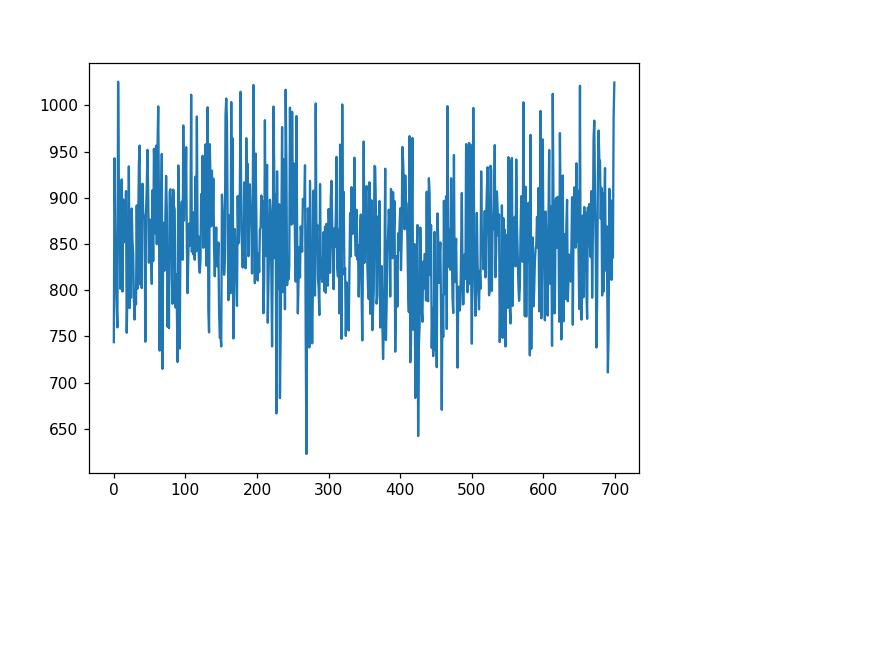

<IPython.core.display.Javascript object>


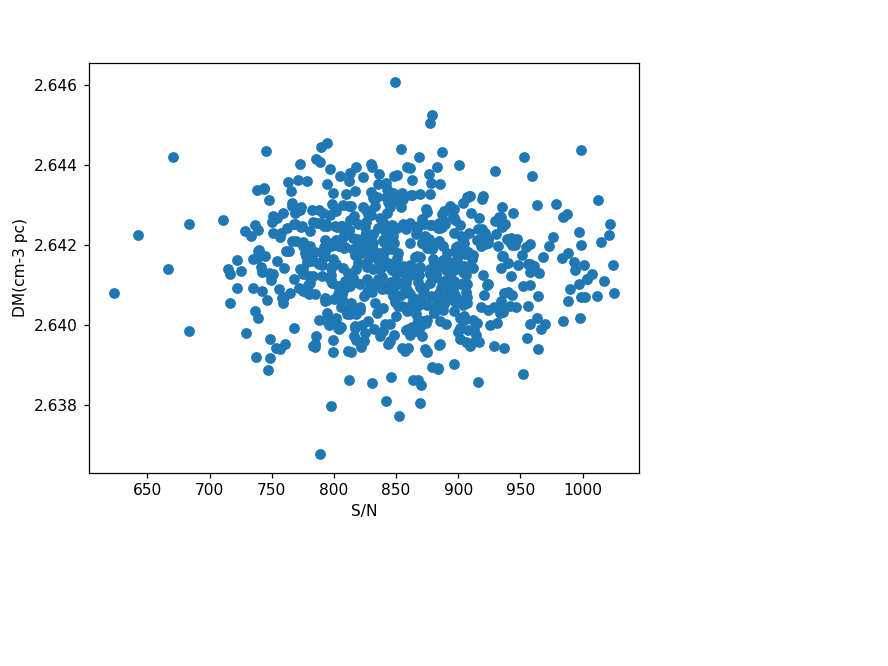

Text(0, 0.5, 'DM(cm-3 pc)')

In [45]:
plt.figure()
plt.plot(Ener_main_comp_64p[:,0])
plt.figure()
#Fig_64p, Axs_64p = plt.subplots(nrows=3,ncols=3)
#for r in range(3):
 #   for j in range(3):
  #      Axs_64p[r,j].scatter(Ener_main_comp_64p[:,2*r+2*j+3],DM_chi_64p[0:dim_64p[0],0],label='Ch'+str(2*r+2*j+3))
   #     Axs_64p[r,j].legend()
plt.scatter(Ener_main_comp_64p[:,0],DM_chi_64p[0:dim_64p[0],0],label='64p')
plt.xlabel('S/N')
plt.ylabel('DM(cm-3 pc)')


In [46]:
COF_64p=np.ndarray([dim_64p[0],dim_64p[2]])
sum=0
for i in range(dim_64p[0]):
    for j in range(dim_64p[3]):
        sum+=j*data_64p[i,0,0,j]
    COF_64p[i,0]=np.divide(sum,np.sum(data_64p[i,0,0,:]))
    sum=0
COF_64p=np.delete(COF_64p,[287,701],0)



<IPython.core.display.Javascript object>


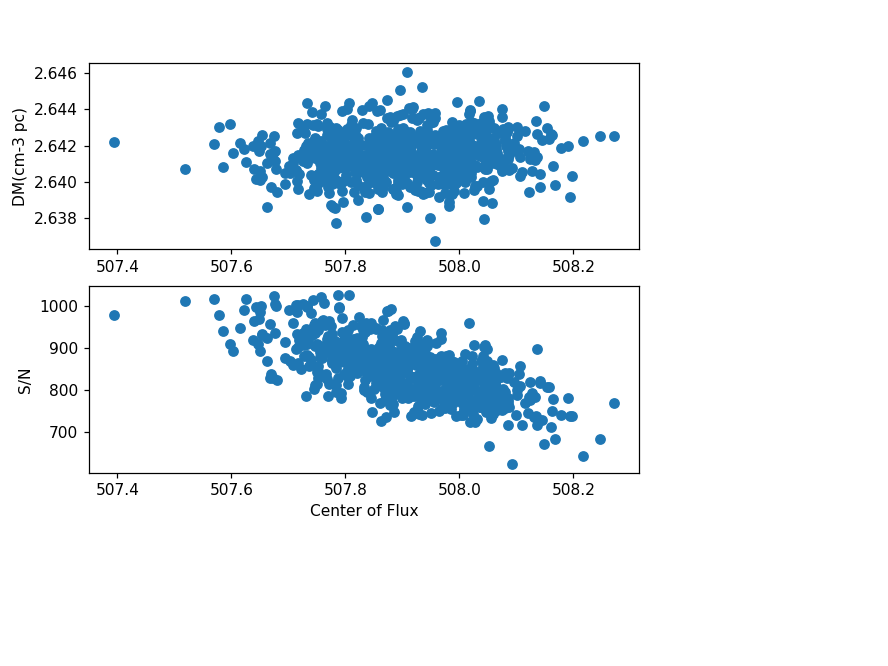

Text(0, 0.5, 'S/N')

In [47]:
plt.figure()
plt.subplot(2,1,1)
plt.scatter(COF_64p[:,0],DM_chi_64p[0:dim_64p[0],0])
plt.ylabel("DM(cm-3 pc)")
plt.subplot(2,1,2)
plt.scatter(COF_64p[:,0],Ener_main_comp_64p[:,0])
plt.xlabel("Center of Flux")
plt.ylabel("S/N")